In [26]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
mpi1 = pd.read_csv('../output/model_output_MPI1.csv')
mpi1 = mpi1.rename(columns={'Unnamed: 0': 'region'})

In [22]:
mpi3 = pd.read_csv('../output/model_output_MPI3.csv')
mpi3 = mpi3.rename(columns={'Unnamed: 0': 'region'})

In [18]:
mpi6 = pd.read_csv('../output/model_output_MPI6.csv')
mpi6 = mpi6.rename(columns={'Unnamed: 0': 'region'})

In [19]:
mpi1.columns

Index(['region', 'experimental_data', 'ndm_data', 'linreg_data', 'residual'], dtype='object')

<AxesSubplot:xlabel='ndm_data', ylabel='experimental_data'>

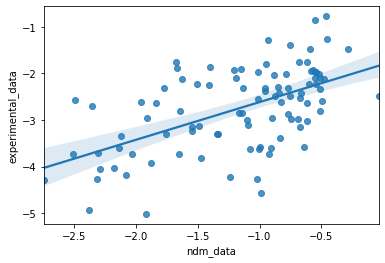

In [20]:
sns.regplot(x='ndm_data', y='experimental_data', data=mpi1)

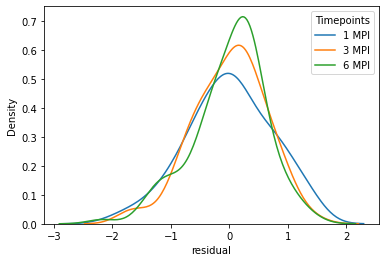

In [28]:
sns.kdeplot(x='residual', data=mpi1, label='1 MPI')
sns.kdeplot(x='residual', data=mpi3, label='3 MPI')
sns.kdeplot(x='residual', data=mpi6, label='6 MPI')
plt.legend(title='Timepoints')
plt.show()